# Project Summary: Malignant vs. Benign Cell Classification using Logistic Regression

## Objective
To classify cells as malignant (cancerous) or benign (non-cancerous) based on input features such as size, shape, and other characteristics.

## Data Preprocessing
- Loaded the dataset and handled missing values.
- Scaled features to ensure uniformity and improve model performance.
- Split the dataset into training and testing sets.

## Model Training
- Built a logistic regression model to predict whether cells are malignant or benign.
- Trained the model using the training set.

## Model Evaluation
- Evaluated model performance using metrics like precision, recall, F1-score, and accuracy.
- Visualized the confusion matrix to analyze correct and incorrect predictions.

## Results
- Achieved high accuracy (~98%) with strong precision and recall for both classes.
- The model effectively distinguishes between malignant and benign cells.

## Conclusion
Logistic regression is a reliable and interpretable approach for binary classification tasks like predicting cell types.


#Logistic Regression is a statistical method used for binary classification, predicting the probability of an outcome (0 or 1) based on input features. It uses the sigmoid function to map predictions to a range between 0 and 1. The model is trained by minimizing log-loss (cross-entropy), which compares predicted probabilities to actual labels.
Key Points:

    Sigmoid Function: Maps linear combinations of inputs to probabilities.
    Cost Function: Log-loss is used to measure model performance.
    Training: Parameters are learned through optimization (e.g., gradient descent).
    Prediction: Outputs a probability, which is thresholded to classify the data.

Evaluation Metrics:

    Accuracy, Precision, Recall, F1-Score.

Applications:

    Medical diagnoses, credit scoring, spam detection.

Logistic regression is a simple and effective model for binary classification tasks.

# Brest Cancer diagnostic

In [47]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [48]:
# read data
data = pd.read_csv('cancercells.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [49]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [50]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


# lets clean the data

(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5]),
 [Text(0.5, 0, 'id'),
  Text(2.5, 0, 'radius_mean'),
  Text(4.5, 0, 'perimeter_mean'),
  Text(6.5, 0, 'smoothness_mean'),
  Text(8.5, 0, 'concavity_mean'),
  Text(10.5, 0, 'symmetry_mean'),
  Text(12.5, 0, 'radius_se'),
  Text(14.5, 0, 'perimeter_se'),
  Text(16.5, 0, 'smoothness_se'),
  Text(18.5, 0, 'concavity_se'),
  Text(20.5, 0, 'symmetry_se'),
  Text(22.5, 0, 'radius_worst'),
  Text(24.5, 0, 'perimeter_worst'),
  Text(26.5, 0, 'smoothness_worst'),
  Text(28.5, 0, 'concavity_worst'),
  Text(30.5, 0, 'symmetry_worst'),
  Text(32.5, 0, 'Unnamed: 32')])

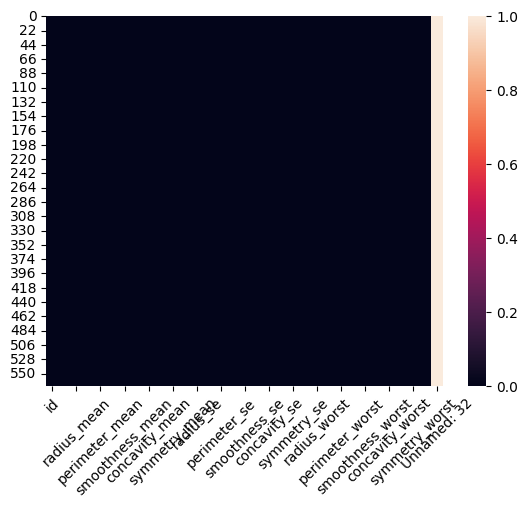

In [51]:
# use heatmap
sns.heatmap(data.isnull())
# set 45 degree angle of x axis
plt.xticks(rotation=45)

In [52]:
# drop unnamed column and id column
data.drop(['Unnamed: 32', 'id'], axis=1,inplace=True)

In [53]:
# check the data no. of columns
num_columns = len(data.columns)

print(f"Number of columns: {num_columns}")

Number of columns: 31


In [54]:
# covert diagnosis in to value 1 and 0 with if m=1 else 0
data.diagnosis = [1 if value == 'M' else 0 for value in data.diagnosis]
# show



<Axes: xlabel='diagnosis'>

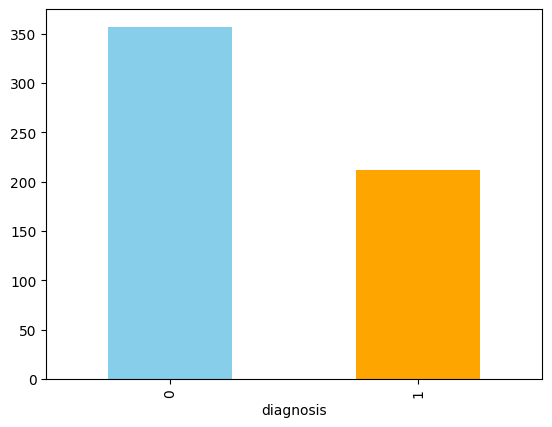

In [59]:
# drea a plot on diagnosis base 0and 1
# use bar plot
data['diagnosis'].value_counts().plot(kind='bar', color=['skyblue', 'orange'])



In [60]:
# divide in to target variable and predictors
y=data['diagnosis']
X=data.drop('diagnosis', axis=1)


In [62]:
X



,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [63]:
y


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [67]:
# now normalize the data because of different values otherwise it wont work need uniform unit
from sklearn.preprocessing import StandardScaler
# create a scalar pobject
scalar = StandardScaler()

# fit and transform the data
X_scaled = scalar.fit_transform(X)

X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [68]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

In [69]:
# train the model
from sklearn.linear_model import LogisticRegression

# create a logistic regression object
log_reg = LogisticRegression()


In [70]:
# train the model
log_reg.fit(X_train, y_train)

# predict the test data
y_pred = log_reg.predict(X_test)

In [71]:

y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [72]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
69     0
542    0
176    0
501    1
247    0
Name: diagnosis, Length: 171, dtype: int64

In [75]:
# evaluate the model
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98


In [78]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



# Metrics Summary:

    Class 0 (Negative Class):
        Precision (0.99): Out of all instances predicted as class 0, 99% were correct.
        Recall (0.98): Out of all actual class 0 instances, 98% were correctly identified.
        F1-Score (0.99): Indicates a strong balance between precision and recall.

    Class 1 (Positive Class):
        Precision (0.97): Out of all instances predicted as class 1, 97% were correct.
        Recall (0.98): Out of all actual class 1 instances, 98% were correctly identified.
        F1-Score (0.98): Indicates good precision and recall balance.

    Overall Metrics:
        Accuracy (0.98): 98% of the predictions were correct across both classes.
        Macro Avg (0.98): The unweighted mean of precision, recall, and F1-score for both classes, indicating balanced performance across classes.
        Weighted Avg (0.98): A weighted mean of precision, recall, and F1-score, giving more weight to class 0 since it has more instances.

Analysis:

    Strong Performance:
        The model performs exceptionally well for both classes, with high precision, recall, and F1-scores for both.
        Accuracy at 98% shows that the model has very few misclassifications overall.

    Class Imbalance:
        There is a slight imbalance in the dataset: 108 instances of class 0 vs. 63 of class 1.
        Despite this, the weighted average shows the model handles the imbalance well.

# Precision: Out of all the times we said "yes," how many were actually "yes"?
Recall: Out of all the actual "yeses," how many did we find?
F1-Score: A mix of precision and recall to show how good we are overall.
Accuracy: Out of all the guesses, how many were correct?
Support: How many times each category appears in the data.

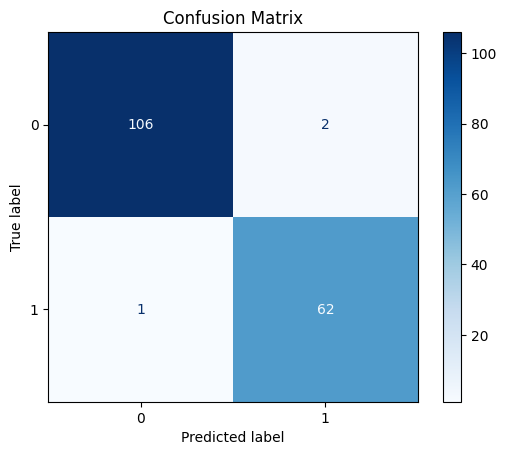

In [79]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

# Add title and show the plot
plt.title("Confusion Matrix")
plt.show()


Explanation:

    confusion_matrix: Computes the confusion matrix, a table showing the counts of true positives, true negatives, false positives, and false negatives.
    ConfusionMatrixDisplay: A utility for visualizing the confusion matrix in a clear and readable format.
    cmap='Blues': Sets the color map for the matrix to make it visually appealing.

Output:

The confusion matrix will display as a heatmap:

    Top-left cell (True Negatives): Correct predictions for class 0.
    Top-right cell (False Positives): Instances misclassified as class 1 instead of 0.
    Bottom-left cell (False Negatives): Instances misclassified as class 0 instead of 1.
    Bottom-right cell (True Positives): Correct predictions for class 1.